<a href="https://colab.research.google.com/github/Rachael-Osoro/Image-Classification-with-CNN/blob/main/Image_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMAGE CLASSIFICATION WITH DEEP LEARNING

## Business understanding

# Data Analytic Question

## Problem Statement

Tibabu Hospital did a research on the accuracy of Pneumonia diagnosis. The the results were  not impressive. So to improve diagnosis of pneumonia using x-rays, tasked us to come up with a solution.
Our task is to come up with a classification algorithm that will determine if a patient has pneumonia or not based on chest X-ray images.


## Context

## Metric of Success
The algorithm will be considered a success once it makes predictions with have a root mean squared error (RMSE) of between 0.2 and 0.5 (with an of Accuracy: 86%-90%).

## Data Understanding
The medical dataset comes from Kaggle contains a set of x-ray images of pediatric patients. The images will show whether the patients have pneumonia or not. Our task is to build a model that can classify whether a given patient has pneumonia given a chest x-ray image. Since this is an Image Classification problem, we will solve it with Deep Learning.


## The Dataset
The dataset that we will use for image classification is the chese_xray which contains two categories: Pneumonia and Normal. The data will be downloaded from https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia to the local drive and unzipped. The data set will be assigned two folders (train and test) and contains a subfolder for each Pneumonia and Normal category.
In each of the folders, there are a lot of x-ray images. To check how many samples were in each category, we will use the OS.listdir methods.


## Plan

1. Load and Pre-process the data.
2. Define the trained generator, validation generator, and test generator.
2. Build a baseline model.
3. Build the deep learning model base. Then, train the model with selected images.
4. Retrain the model with complete training data. 
5. Evaluate the model with the test images.

### Libraries | Modules.

We start by importing all the necessary Libraries | Modules.

In [3]:
# import all relevant libraries

import numpy as np 
import pandas as pd

# visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

# tensorflow

import os, shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Flatten,Activation, Dropout 
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

# sklearn
from sklearn.metrics import classification_report,confusion_matrix

Next we will load the data using `os.listdir` method

In [4]:
# directory for the chest_xray folder

print(os.listdir('/content/drive/MyDrive/chest_xray'))

['val', 'test', 'train']


We stored the data for both normal and pneumonia xray images into variables for easy access. Thi is for our train, test and val data.

In [5]:
# store train normal xrays and train pneumonia xrays as variables.

train_norm_img = os.listdir('/content/drive/MyDrive/chest_xray/train/NORMAL')
train_pneu_img = os.listdir('/content/drive/MyDrive/chest_xray/train/PNEUMONIA')

print(np.shape(train_norm_img))
print(np.shape(train_pneu_img))

(1341,)
(3875,)


In [6]:
# store train normal xrays and test pneumonia xrays as variables.

test_norm_img = os.listdir('/content/drive/MyDrive/chest_xray/test/NORMAL')
test_pneu_img = os.listdir('/content/drive/MyDrive/chest_xray/test/PNEUMONIA')


In [7]:
# directory for the chest_xray train normal folder
#df = os.listdir('data/chest_xray/__MACOSX/chest_xray/train/NORMAL')

print(os.listdir('/content/drive/MyDrive/chest_xray/train/NORMAL'))

['IM-0526-0001.jpeg', 'IM-0523-0001-0002.jpeg', 'IM-0509-0001.jpeg', 'IM-0524-0001.jpeg', 'IM-0525-0001.jpeg', 'IM-0520-0001.jpeg', 'IM-0511-0001.jpeg', 'IM-0512-0001.jpeg', 'IM-0516-0001.jpeg', 'IM-0529-0001.jpeg', 'IM-0545-0001-0001.jpeg', 'IM-0549-0001-0001.jpeg', 'IM-0533-0001-0002.jpeg', 'IM-0543-0001.jpeg', 'IM-0542-0001.jpeg', 'IM-0543-0001-0002.jpeg', 'IM-0549-0001-0002.jpeg', 'IM-0547-0001.jpeg', 'IM-0544-0001.jpeg', 'IM-0553-0001-0001.jpeg', 'IM-0551-0001.jpeg', 'IM-0538-0001.jpeg', 'IM-0546-0001.jpeg', 'IM-0540-0001.jpeg', 'IM-0551-0001-0002.jpeg', 'IM-0533-0001.jpeg', 'IM-0549-0001.jpeg', 'IM-0545-0001.jpeg', 'IM-0535-0001.jpeg', 'IM-0537-0001.jpeg', 'IM-0545-0001-0002.jpeg', 'IM-0536-0001.jpeg', 'IM-0541-0001.jpeg', 'IM-0539-0001-0001.jpeg', 'IM-0548-0001.jpeg', 'IM-0551-0001-0001.jpeg', 'IM-0552-0001.jpeg', 'IM-0532-0001.jpeg', 'IM-0531-0001.jpeg', 'IM-0539-0001-0002.jpeg', 'IM-0534-0001.jpeg', 'IM-0553-0001-0002.jpeg', 'IM-0539-0001.jpeg', 'IM-0533-0001-0001.jpeg', 'IM-0

We try to view some of the images in the folder opened above.

NORMAL LUNG


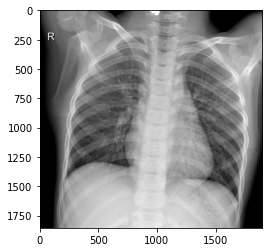

In [8]:
# Display an image from the train NORMAL folder.
#image.ImageDataGenerator()

img_name = 'NORMAL2-IM-0401-0001.jpeg'
normal_lung = load_img('/content/drive/MyDrive/chest_xray/train/NORMAL/' + img_name)

# normal chest x-ray
print('NORMAL LUNG')
plt.imshow(normal_lung)
plt.show()

In [9]:
# directory for the chest_xray train PNEUMONIA folder

print(os.listdir('/content/drive/MyDrive/chest_xray/test/PNEUMONIA'))

['person101_bacteria_485.jpeg', 'person108_bacteria_504.jpeg', 'person101_bacteria_483.jpeg', 'person108_bacteria_506.jpeg', 'person102_bacteria_487.jpeg', 'person108_bacteria_511.jpeg', 'person100_bacteria_482.jpeg', 'person108_bacteria_507.jpeg', 'person103_bacteria_488.jpeg', 'person100_bacteria_475.jpeg', 'person101_bacteria_484.jpeg', 'person100_bacteria_479.jpeg', 'person100_bacteria_478.jpeg', 'person100_bacteria_477.jpeg', 'person103_bacteria_490.jpeg', 'person104_bacteria_492.jpeg', 'person109_bacteria_512.jpeg', 'person109_bacteria_517.jpeg', 'person101_bacteria_486.jpeg', 'person109_bacteria_513.jpeg', 'person109_bacteria_522.jpeg', 'person103_bacteria_489.jpeg', 'person104_bacteria_491.jpeg', 'person109_bacteria_519.jpeg', 'person100_bacteria_480.jpeg', 'person100_bacteria_481.jpeg', 'person37_virus_82.jpeg', 'person1674_virus_2890.jpeg', 'person1608_virus_2786.jpeg', 'person138_bacteria_659.jpeg', 'person128_bacteria_606.jpeg', 'person137_bacteria_655.jpeg', 'person117_bac

PNEUMONIA LUNG


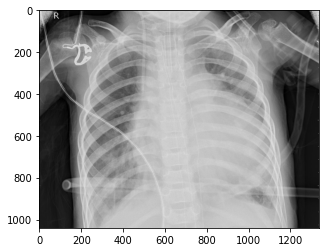

In [10]:
# Display an image from the train NORMAL folder.
#image.ImageDataGenerator()

img_name = 'person108_bacteria_504.jpeg'
pneumonia_lung = load_img('/content/drive/MyDrive/chest_xray/test/PNEUMONIA/' + img_name)

# pneumonia chest x-ray
print('PNEUMONIA LUNG')
plt.imshow(pneumonia_lung)
plt.show()

We went further to explore the shape of both the images and the labels of our training, testing and validation data.

In [11]:
# preview the shape of train data

print(np.shape(train_norm_img))
print(np.shape(train_pneu_img))

(1341,)
(3875,)


In [12]:
# preview the shape of test data

print(np.shape(test_norm_img))
print(np.shape(test_pneu_img))

(234,)
(390,)


Due to the small size of the validation set, this data will be merged with the training data.

Next we'll do some visualizations for train and test data.

## Visualizations

### Training Set

In [13]:
# combining the train and val data

total_train = train_norm_img + train_pneu_img
print(np.shape(total_train))

(5216,)


The total count for people without pneumonia is: 1341
----------------------------------------------------------------------------------
The total count for people with for pneuomonia is: 3875


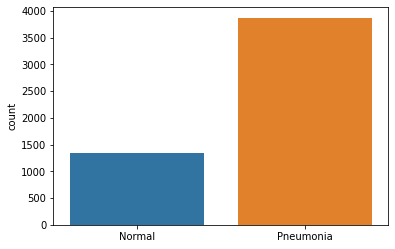

In [14]:
# creating countplot for total_counts_train

total_counts_train = []
pneu_len_train = 0
norm_len_train = 0
for i in total_train:
    if i[0] == 'p':
        total_counts_train.append('Pneumonia')
        pneu_len_train += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_train.append('Normal')
        norm_len_train += 1
        
sns.countplot(x=total_counts_train);
print('The total count for people without pneumonia is: {}'.format(norm_len_train))
print('----------------------------------------------------------------------------------')
print('The total count for people with for pneuomonia is: {}'.format(pneu_len_train))

### Test Set

In [15]:
# combining the test data for plotting visualizations

total_test = test_norm_img + test_pneu_img
print(np.shape(total_test))

(624,)


The total count for people without pneumonia is: 234
----------------------------------------------------------------------------------
The total count for people with for pneuomonia is: 390


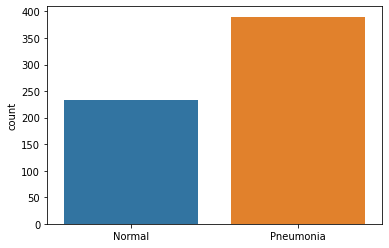

In [16]:
# creating countplot for total_counts_test

total_counts_test= []
pneu_len_test = 0
norm_len_test = 0
for i in total_test:
    if i[0] == 'p':
        total_counts_test.append('Pneumonia')
        pneu_len_test += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_test.append('Normal')
        norm_len_test += 1
        
sns.countplot(x=total_counts_test);
print('The total count for people without pneumonia is: {}'.format(norm_len_test))
print('----------------------------------------------------------------------------------')
print('The total count for people with for pneuomonia is: {}'.format(pneu_len_test))

## Reshaping and Normalizing the Data

This step is crucial to provide us with a uniform set of data easy to work with during our modelling. Normalizing will optimize the models by making convergence faster.

In [17]:
# first convert our data into array
train = '/content/drive/MyDrive/chest_xray/train'
test = '/content/drive/MyDrive/chest_xray/test'

In [18]:
# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=len(total_train),
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        # This is the target directory
        test,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=len(total_test),
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# create new datasets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)


In [ ]:
# viewing an xray from our new dataset.

array_to_img(train_images[10])

In [ ]:
# viewing our labels

train_labels

In [ ]:
# shape of our new data

print('The new train shape is:', train_images.shape)
print('The new test shape is:', test_images.shape)

In [ ]:
# identifying our normal and pneumonia xrays

train_generator.class_indices

In [ ]:
test_labels.shape

In [ ]:
# transposing datasets
train_images_flat = train_images.reshape(5216, -1).T
test_images_flat = test_images.reshape(624, -1).T
train_labels_transposed = train_labels.reshape((-1, 1)).T
test_labels_transposed = test_labels.reshape((-1, 1)).T

In [ ]:
train_images1 = train_images.astype(np.float32)
train_labels1 = train_labels.astype(np.int64)
test_images1 = test_labels.astype(np.float32)
test_labels1 = test_labels.astype(np.int64)

In [ ]:
train_images1.shape

In [ ]:
test_labels_transposed.shape

In [ ]:
train_images_flat.shape

In [ ]:
train_labels_transposed.shape

# MODELLING

## Baseline Model


In [ ]:
# create our baseline model
# instantiate a sequential model
baseline_model = Sequential(name="baseline")

# add hidden layers
tf.keras.layers.Flatten()
baseline_model.add(Dense(128, activation="relu"))
baseline_model.add(Dense(72, activation="relu"))

# add output layer
baseline_model.add(Dense(1, activation="sigmoid"))


## Compile

In [ ]:
# compiling our model

baseline_model.compile(optimizer="adam",
                       loss="sparse_categorical_crossentropy",
                       metrics=['accuracy'])


In [ ]:
# fit baseline model

baseline_model.fit(train_images1, train_labels1,
                   epochs=5, batch_size=1000
                   )